In [2]:
!pip install kagglehub

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prasad22/healthcare-dataset")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 2.91M/2.91M [00:00<00:00, 4.12MB/s]

Extracting files...
Path to dataset files: C:\Users\WuppukonduruVV\.cache\kagglehub\datasets\prasad22\healthcare-dataset\versions\2


In [12]:
ls

 Volume in drive C is OS
 Volume Serial Number is D041-844B

 Directory of C:\Users\WuppukonduruVV\Downloads\databricks-ml-pro\pandas-analysis

12/04/2025  11:42    <DIR>          .
05/04/2025  12:37    <DIR>          ..
12/04/2025  11:37    <DIR>          .ipynb_checkpoints
12/04/2025  11:41            13.123 Healthcare_analysis.ipynb
12/04/2025  11:38         8.399.221 healthcare_dataset.csv
05/04/2025  12:50       172.026.270 Untitled.ipynb
               3 File(s)    180.438.614 bytes
               3 Dir(s)  346.753.724.416 bytes free


In [15]:
import pandas as pd 
import os 
path = './healthcare_dataset.csv'
# os.chmod(path, 0o666)

init_df = pd.read_csv(path)

In [16]:
init_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [17]:
init_df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [18]:
init_df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [19]:
init_df.nunique()

Name                  49992
Age                      77
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1827
Doctor                40341
Hospital              39876
Insurance Provider        5
Billing Amount        50000
Room Number             400
Admission Type            3
Discharge Date         1856
Medication                5
Test Results              3
dtype: int64

In [30]:
pd.set_option('display.max_columns',25)
pd.set_option('display.max_rows',10)
pd.set_option('display.max_colwidth', None)

In [114]:
init_df.groupby('Blood Type')['Medical Condition'].apply(lambda x:list(x.unique())).values_counts().reset_index(name='Medical_condition')

AttributeError: 'SeriesGroupBy' object has no attribute 'values_counts'

In [36]:
init_df.groupby(['Hospital','Insurance Provider']).agg(Bills=('Billing Amount','sum')).sort_values(by='Bills',ascending=False)

,,Bills
Hospital,Insurance Provider,
Inc Jones,UnitedHealthcare,369045.141883
Smith PLC,Medicare,354782.671014
Ltd Smith,Blue Cross,352409.230923
Smith LLC,Cigna,345999.850725
Ltd Smith,Cigna,340206.616415
...,...,...
Diaz-Bishop,Cigna,-1353.705003
Ltd Wilson,Cigna,-1520.420555
"Fitzpatrick, Nielsen and Mcdonald",Aetna,-1774.048438


In [45]:
mask = (init_df['Hospital'] == 'Inc Jones') & (init_df['Insurance Provider'] == 'UnitedHealthcare')

In [53]:
init_df.loc[mask][['Hospital','Billing Amount']]

,Hospital,Billing Amount
9986,Inc Jones,13619.342612
10770,Inc Jones,38510.454694
12988,Inc Jones,45997.341583
20827,Inc Jones,48400.121517
34040,Inc Jones,29660.257231
34236,Inc Jones,46984.445857
36461,Inc Jones,44103.391297
38432,Inc Jones,12171.578029
49216,Inc Jones,43600.867481
52935,Inc Jones,45997.341583


In [58]:
init_df['Medical Condition'].unique()

array(['Cancer', 'Obesity', 'Diabetes', 'Asthma', 'Hypertension',
       'Arthritis'], dtype=object)

In [59]:
init_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [80]:
# Which medical condition has more avg billing amount 
init_df.groupby(by='Medical Condition')['Billing Amount'].mean().reset_index().sort_values(by='Billing Amount', ascending=False)

,Medical Condition,Billing Amount
5,Obesity,25805.971259
3,Diabetes,25638.405577
1,Asthma,25635.249359
0,Arthritis,25497.327056
4,Hypertension,25497.095761
2,Cancer,25161.792707


In [96]:
# Which medical conditon has more number of urgency cases?
urgency_df = init_df.groupby(by='Medical Condition')['Admission Type'].value_counts().reset_index()
urgency_df[urgency_df['Admission Type']=='Urgent'].sort_values(by='count',ascending=False)


,Medical Condition,Admission Type,count
9,Diabetes,Urgent,3229
0,Arthritis,Urgent,3117
4,Asthma,Urgent,3081
7,Cancer,Urgent,3064
16,Obesity,Urgent,3062
13,Hypertension,Urgent,3023


In [103]:
mask = (init_df['Admission Type'] == 'Urgent') & (init_df['Medical Condition'] == 'Diabetes')

filtered_Df = init_df.loc[mask][['Date of Admission','Discharge Date','Hospital','Doctor','Billing Amount']]
filtered_Df['Date of Admission'] = pd.to_datetime(filtered_Df['Date of Admission'])
filtered_Df['Discharge Date'] = pd.to_datetime(filtered_Df['Discharge Date'])

filtered_Df['Days Admitted'] = (filtered_Df['Discharge Date'] - filtered_Df['Date of Admission'])

In [110]:
filtered_Df.sort_values(by='Billing Amount',ascending=False)

,Date of Admission,Discharge Date,Hospital,Doctor,Billing Amount,Days Admitted
7088,2020-08-11,2020-08-12,Miller Ltd,Kristin Clark,52211.852966,1 days
44936,2019-07-13,2019-07-21,Clark-Espinoza,Debbie Donaldson,51848.201597,8 days
18677,2019-10-14,2019-10-28,LLC Walsh,Joshua Hernandez,51198.118507,14 days
27096,2020-07-16,2020-08-13,Green PLC,Ariana Jones,51093.106289,28 days
43638,2020-04-02,2020-04-05,"Key and Hayes, Mcknight",George Graham,51035.604543,3 days
...,...,...,...,...,...,...
6596,2019-06-30,2019-07-09,Group Mcconnell,Kathryn Ray,-367.203959,9 days
47484,2023-12-25,2023-12-29,Ayers-Smith,Adam Pitts,-483.708894,4 days
2103,2021-03-21,2021-04-17,"and Huff Reeves, Dennis",Wendy Ramos,-576.727907,27 days
45596,2022-02-04,2022-03-01,Thomas Sons and,Stephen Jensen,-614.945586,25 days


In [133]:
grouped_df = init_df.groupby('Blood Type')['Medical Condition'].value_counts().reset_index().sort_values(by='count',ascending=False)

<Axes: title={'center': 'Blood type and Disease relation for AB-'}, xlabel='Medical Condition', ylabel='People admitted for disease'>

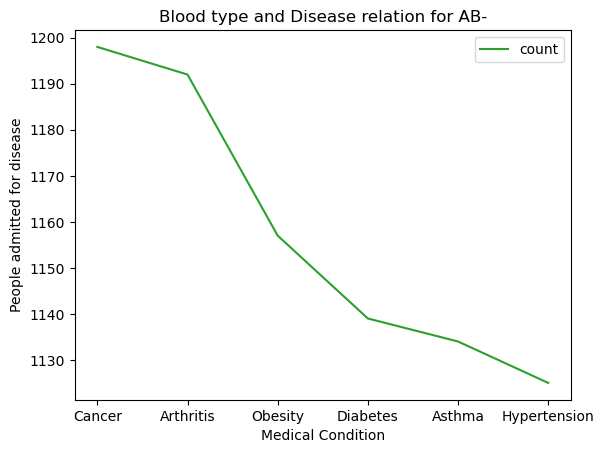

In [146]:
grouped_df[grouped_df['Blood Type'] == 'AB-'].plot(x='Medical Condition',ylabel='People admitted for disease',title='Blood type and Disease relation for AB-',color='C2')